In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data = data.iloc[: , 2 : ]

In [5]:
data.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [6]:
ss = StandardScaler()
data["EstimatedSalary"]=ss.fit_transform(data[["EstimatedSalary"]])

In [7]:
data.head(3)

,Age,EstimatedSalary,Purchased
0,19,-1.490046,0
1,35,-1.460681,0
2,26,-0.785290,0


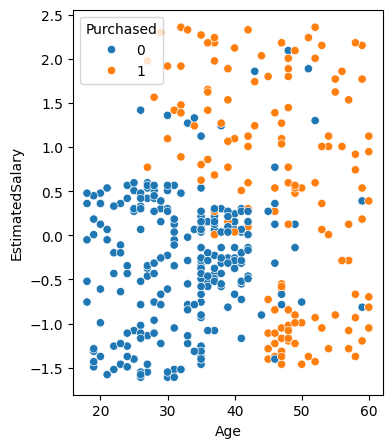

In [60]:
plt.figure(figsize=(4,5))
sns.scatterplot(x = "Age" , y = "EstimatedSalary" , data=data , hue = "Purchased")
plt.show()

In [8]:
x = data.iloc[: , :-1]
y = data["Purchased"]

In [55]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2) #degree is a parameter that affects on accuracy

pf.fit(x)

PolynomialFeatures()

In [56]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 8)

In [57]:
svm = SVC(kernel = "linear")
svm.fit(x_train , y_train)

SVC(kernel='linear')

In [52]:
svm.score(x_train , y_train)*100 , svm.score(x_test , y_test)*100

(85.3125, 81.25)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


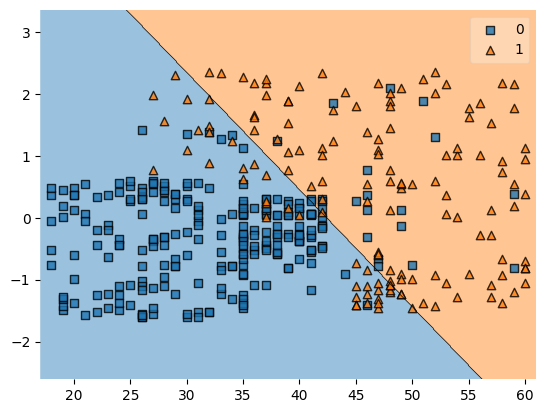

In [58]:
plot_decision_regions(x.to_numpy() , y.to_numpy() , clf = svm)
plt.show()

In [59]:
svm.predict([[46 , 1.387710]])

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])